### 1. Load Datasets
Loading test, train and validation sets into pandas dataframe

In [3]:
import pandas as pd

df_train = pd.read_json('../../data/train.json', lines=True)
df_test = pd.read_json('../../data/test.json', lines=True)
df_validation = pd.read_json('../../data/validation.json', lines=True)

### 2. Exploratory Data Analysis (Sayeed, Jui)
#### Analyzing training dataset

In [4]:
df_train.info()

<class 'pandas.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   quality_checked  1112 non-null   object
 1   text             1112 non-null   str   
 2   task             1112 non-null   str   
 3   meta             1112 non-null   object
 4   doc_id           1112 non-null   str   
 5   dataset_type     1112 non-null   str   
 6   annotator_id     1112 non-null   str   
 7   entity_mentions  1112 non-null   object
dtypes: object(3), str(5)
memory usage: 8.8+ MB


Observed no null values

In [5]:
df_train.head()

,quality_checked,text,task,meta,doc_id,dataset_type,annotator_id,entity_mentions
0,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator1,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator2,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
2,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator8,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
3,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,train,annotator11,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
4,[],PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741,train,annotator1,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."


Observation: We do not need dataset_type because the test, train and validation files are already separate. We also do not need the columns quality_checked, annotator_id.

Dropping unrequired columns.

In [6]:
df_train.drop(columns=['quality_checked', 'dataset_type', 'annotator_id'])

,text,task,meta,doc_id,entity_mentions
0,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
2,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
3,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
4,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
...,...,...,...,...,...
1107,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Helmut Ludescher', 'articles': ...",001-60002,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1108,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'J. Peter', 'articles': [91, 34,...",001-146353,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1109,PROCEDURE\n\nThe case was referred to the Cour...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Christopher Ian Scott', 'articl...",001-58010,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."
1110,PROCEDURE\n\nThe case originated in an applica...,Task: Annotate the document to anonymise the f...,"{'applicant': 'Henryk Kreuz', 'articles': [91,...",001-61921,"[{'confidential_status': 'NOT_CONFIDENTIAL', '..."


Analyzing task column

In [7]:
df_train['task'].unique()

<ArrowStringArray>
[       'Task: Annotate the document to anonymise the following person: Henrik Hasslund',
            'Task: Annotate the document to anonymise the following person: D. Stępniak',
         'Task: Annotate the document to anonymise the following person: Nusret Amutgan',
           'Task: Annotate the document to anonymise the following person: Mustafa Sarı',
      'Task: Annotate the document to anonymise the following person: Dariusz Karwowski',
         'Task: Annotate the document to anonymise the following person: İlhan Karakurt',
        'Task: Annotate the document to anonymise the following person: Artur Warsiński',
   'Task: Annotate the document to anonymise the following person: Włodzimierz Majewski',
         'Task: Annotate the document to anonymise the following person: İlhami Erseven',
            'Task: Annotate the document to anonymise the following person: Semir Güzel',
 ...
       'Task: Annotate the document to anonymise the following person: Zeker

Observation: we don't need the task column

Finding out how many unique values are there in text column and doc_id column. Making sure they match.

In [8]:
len(df_train['text'].unique())

1014

In [9]:
len(df_train['doc_id'].unique())

1014

Observation: We have 1014 unique values for documents but the dataset has 1112 entries. So there might be duplicates.

In [10]:
df_train['meta'][0]

{'applicant': 'Henrik Hasslund',
 'articles': [91, 34, 54, 34, 93],
 'countries': 'DNK',
 'legal_branch': 'CHAMBER',
 'year': 2008}

Observation: We may be able to reserve this column for later evaluation. Might be helpful to find out if our model struggles with region specific names, or has a bias, etc.

In [11]:
df_train_meta = df_train[['text', 'meta', 'doc_id']].copy()
df_train_meta.head()

,text,meta,doc_id
0,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
1,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
2,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
3,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'Henrik Hasslund', 'articles': [...",001-90194
4,PROCEDURE\n\nThe case originated in an applica...,"{'applicant': 'D. Stępniak', 'articles': [91, ...",001-84741


In [15]:
df_train_meta.to_csv('../../data/metadata/train_meta.csv')

In [17]:
df_test_meta = df_test[['text', 'meta', 'doc_id']].copy()
df_test_meta.to_csv('../../data/metadata/test_meta.csv')

df_validation_meta = df_validation[['text', 'meta', 'doc_id']].copy()
df_validation_meta.to_csv('../../data/metadata/validation_meta.csv')

Exploring entity mentions column

In [18]:
df_train['entity_mentions'][1]

[{'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 62,
  'entity_id': '001-90194_a2_e1',
  'entity_mention_id': '001-90194_a2_em1',
  'entity_type': 'CODE',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': '36244/06',
  'start_offset': 54},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'correct',
  'end_offset': 94,
  'entity_id': '001-90194_a2_e2',
  'entity_mention_id': '001-90194_a2_em2',
  'entity_type': 'ORG',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': 'Kingdom of Denmark',
  'start_offset': 76},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 242,
  'entity_id': '001-90194_a2_e3',
  'entity_mention_id': '001-90194_a2_em3',
  'entity_type': 'DEM',
  'identifier_type': 'QUASI',
  'related_mentions': None,
  'span_text': 'Danish',
  'start_offset': 236},
 {'confidential_status': 'NOT_CONFIDENTIAL',
  'edit_type': 'check',
  'end_offset': 271,
  '

In [19]:
import json
df_train_exploded = df_train.explode('entity_mentions')
entities_flat = pd.json_normalize(df_train_exploded['entity_mentions'])
df_train_entities = pd.concat([df_train_exploded[['doc_id']].reset_index(drop=True), entities_flat.reset_index(drop=True)], axis=1)

df_train_entities.head()

,doc_id,confidential_status,edit_type,end_offset,entity_id,entity_mention_id,entity_type,identifier_type,related_mentions,span_text,start_offset
0,001-90194,NOT_CONFIDENTIAL,check,62,001-90194_a1_e1,001-90194_a1_em1,CODE,DIRECT,None,36244/06,54
1,001-90194,NOT_CONFIDENTIAL,correct,94,001-90194_a1_e2,001-90194_a1_em2,ORG,NO_MASK,None,Kingdom of Denmark,76
2,001-90194,NOT_CONFIDENTIAL,check,242,001-90194_a1_e3,001-90194_a1_em3,DEM,NO_MASK,None,Danish,236
3,001-90194,NOT_CONFIDENTIAL,check,271,001-90194_a1_e4,001-90194_a1_em4,PERSON,DIRECT,None,Mr Henrik Hasslund,253
4,001-90194,NOT_CONFIDENTIAL,check,308,001-90194_a1_e5,001-90194_a1_em5,DATETIME,QUASI,None,31 August 2006,294


Observation: We have start_offset, end_offset and entity_type. We need to extract this data to create a token and tags for finetuning DistilliBERT model.

Checking the counts of entities for filtered set where identifier_type is not NO_MASK

Entity Type Counts:


<Axes: title={'center': 'Distribution of Entity Types'}, xlabel='entity_type'>

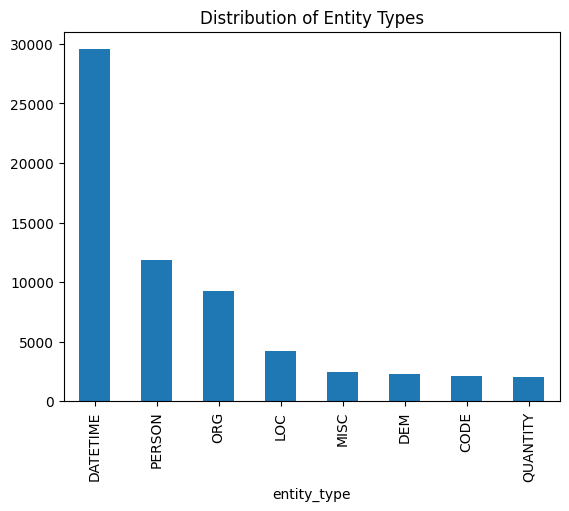

In [21]:
import matplotlib
print("Entity Type Counts:")
entity_type_stats = df_train_entities[df_train_entities['identifier_type'] != 'NO_MASK']['entity_type'].value_counts()
entity_type_stats.plot(kind='bar', title='Distribution of Entity Types')

Certain imbalance of data is seen here where datetime entities are much higher in count than quantity or code

<Axes: title={'center': 'Distribution of Masking Needs'}, xlabel='identifier_type'>

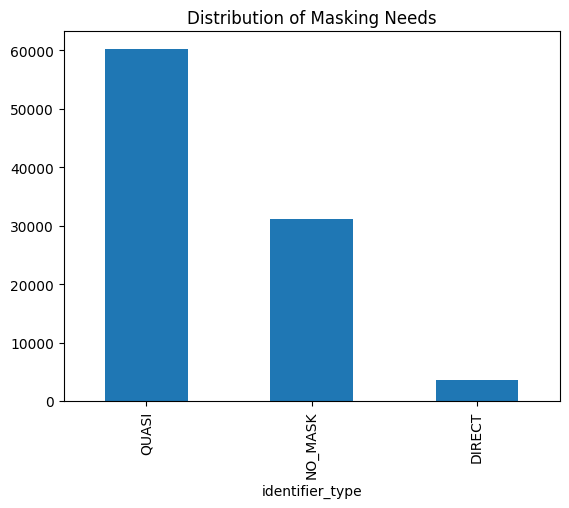

In [22]:
# Check masking requirements
mask_stats = df_train_entities['identifier_type'].value_counts()
mask_stats.plot(kind='bar', title='Distribution of Masking Needs')

<Axes: title={'center': 'Entities per Document Distribution'}, xlabel='Number of Entities', ylabel='Number of Documents'>

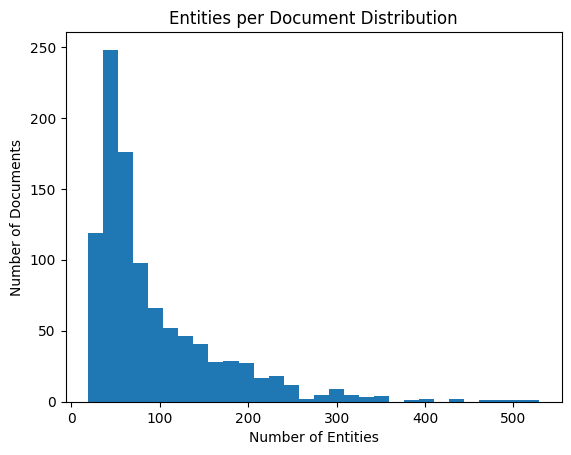

In [23]:
entities_per_doc = df_train_entities.groupby('doc_id').size().sort_values(ascending=False)
entities_per_doc.plot(kind='hist', bins=30, title='Entities per Document Distribution', xlabel='Number of Entities', ylabel='Number of Documents')

In [24]:
print(f"Average entities per document: {entities_per_doc.mean():.2f}")

Average entities per document: 93.72


### 3. Data pre-processing (Jui)
Converting offests to list

In [20]:
def convert_offsets_to_lists(row):
    text = row['text']
    entities = row['entity_mentions']

    # create character-level map
    char_tags = ["O"] * len(text)

    for ent in entities:
        # Filter 'NO_MASK' entities
        if ent.get('identifier_type') == 'NO_MASK':
            continue

        start, end = ent['start_offset'], ent['end_offset']
        label = ent['entity_type']

        # fill character-level map
        if start < len(text) and end <= len(text):
            char_tags[start] = f"B-{label}" # beginning of entity
            for i in range(start+1, end):
                char_tags[i] = f"I-{label}" # inside entity

    # convert character map to word - tag
    tokens = text.split()
    ner_tags = []

    cursor = 0
    for token in tokens:
        # advance cursor to the start of word (skipping spaces)
        while cursor < len(text) and text[cursor].isspace():
            cursor += 1

        # tag of the word is the tag of its first character
        if cursor < len(text):
            ner_tags.append(char_tags[cursor])
            cursor += len(token)
        else:
            ner_tags.append("O")

    return {"tokens": tokens, "ner_tags": ner_tags}

In [21]:
from datasets import Dataset

# converting Pandas to Hugging Face Dataset
hf_train = Dataset.from_pandas(df_train)
train_processed = hf_train.map(convert_offsets_to_lists)

# Quick Check:
print(train_processed[0]['tokens'])
print(train_processed[0]['ner_tags'])

Map:   0%|          | 0/1112 [00:00<?, ? examples/s]

['PROCEDURE', 'The', 'case', 'originated', 'in', 'an', 'application', '(no.', '36244/06)', 'against', 'the', 'Kingdom', 'of', 'Denmark', 'lodged', 'with', 'the', 'Court', 'under', 'Article', '34', 'of', 'the', 'Convention', 'for', 'the', 'Protection', 'of', 'Human', 'Rights', 'and', 'Fundamental', 'Freedoms', '(“the', 'Convention”)', 'by', 'a', 'Danish', 'national,', 'Mr', 'Henrik', 'Hasslund', '(“the', 'applicant”),', 'on', '31', 'August', '2006.', 'The', 'applicant', 'was', 'represented', 'by', 'Mr', 'Tyge', 'Trier,', 'a', 'lawyer', 'practising', 'in', 'Copenhagen.', 'The', 'Danish', 'Government', '(“the', 'Government”)', 'were', 'represented', 'by', 'their', 'Agent,', 'Ms', 'Nina', 'Holst-Christensen', 'of', 'the', 'Ministry', 'of', 'Justice.', 'On', '5', 'September', '2007', 'the', 'Acting', 'President', 'of', 'the', 'Fifth', 'Section', 'decided', 'to', 'give', 'notice', 'of', 'the', 'application', 'to', 'the', 'Government.', 'It', 'was', 'also', 'decided', 'to', 'rule', 'on', 'the

Create label mappings from train set to be used to pass when training the model, same mappings would be used during tokenization of test and validation sets as well

In [22]:
# extracting unique tags from training data
unique_tags = set(tag for row in train_processed for tag in row['ner_tags'])
label_list = sorted(list(unique_tags)) # e.g., ['B-LOC', 'B-PER', 'I-PER', 'O']

# createing maps
label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for i, label in enumerate(label_list)}

print(f"Number of labels: {len(label_list)}")
print(label2id)

Number of labels: 17
{'B-CODE': 0, 'B-DATETIME': 1, 'B-DEM': 2, 'B-LOC': 3, 'B-MISC': 4, 'B-ORG': 5, 'B-PERSON': 6, 'B-QUANTITY': 7, 'I-CODE': 8, 'I-DATETIME': 9, 'I-DEM': 10, 'I-LOC': 11, 'I-MISC': 12, 'I-ORG': 13, 'I-PERSON': 14, 'I-QUANTITY': 15, 'O': 16}


Using AutoTokenizer to handle sub-words and align new tags. Defining tokenization function to be used various versions of BERT

In [23]:
def tokenize_and_align(examples, tokenizer):
  '''Takes the tokenizer object as input and operated on a row in huggingface dataset object'''
  # split words into sub-words
  tokenized_inputs = tokenizer(examples["tokens"], truncation=True, is_split_into_words=True)

  labels = []
  for i, label in enumerate(examples["ner_tags"]):
      word_ids = tokenized_inputs.word_ids(batch_index=i) #supported only for fast tokenizers
      previous_word_idx = None
      label_ids = []
      for word_idx in word_ids:
          if word_idx is None:
              # special tokens like [CLS] get -100 (ignored)
              label_ids.append(-100)
          elif word_idx != previous_word_idx:
              # first piece of a word gets the real label ID
              label_ids.append(label2id[label[word_idx]]) #using map created from training set
          else:
              # subsequent pieces (e.g., "##lor") get -100 (ignored)
              label_ids.append(-100)
          previous_word_idx = word_idx
      labels.append(label_ids)

  tokenized_inputs["labels"] = labels
  return tokenized_inputs

Writing a script for processing test and validation sets

In [24]:
def preprocess_data(df, tokenizer):
  '''Takes a pandas dataframe and a tokenizer object and returns a tokenized huggingface dataset object ready to be passed into BERT for training
  '''
  # converting Pandas to Hugging Face Dataset
  hf = Dataset.from_pandas(df)
  processed = hf.map(convert_offsets_to_lists)
  #tokenize
  tokenized = processed.map(tokenize_and_align, batched=True, fn_kwargs={"tokenizer": tokenizer})

  return tokenized

Importing AutoTokenizer to use various BERT tokenizers

In [25]:
from transformers import AutoTokenizer

## 4. Bi-LSTM (Jui)

Using DistilBERT tokenizer to keep the comparison fair

In [26]:
tokenizer_distilbert = AutoTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [27]:
train_distilbert = preprocess_data(df_train ,tokenizer_distilbert)

Map:   0%|          | 0/1112 [00:00<?, ? examples/s]

Map:   0%|          | 0/1112 [00:00<?, ? examples/s]

In [28]:
test_distilbert = preprocess_data(df_test, tokenizer_distilbert)
validation_distilbert = preprocess_data(df_validation, tokenizer_distilbert)

Map:   0%|          | 0/555 [00:00<?, ? examples/s]

Map:   0%|          | 0/555 [00:00<?, ? examples/s]

Map:   0%|          | 0/541 [00:00<?, ? examples/s]

Map:   0%|          | 0/541 [00:00<?, ? examples/s]

Importing pyTorch

In [29]:
import torch
import torch.nn as nn

In [30]:
#setup GPU availability
if torch.backends.mps.is_available():
    device = torch.device('mps') #mac m3 chip integrated gpu
    print(f"MPS device found: {device}")
elif torch.cuda.is_available():
    device = torch.device('cuda')
    print(f"GPU device found: {device}")
else:
    device = torch.device('cpu')
    print(f"No GPU device found. Falling back to {device}")

No GPU device found. Falling back to cpu


Defining the Bi-LSTM model for NER

In [31]:
class bilstm_nre(nn.Module):
  def __init__(self, vocab_size, num_labels, embed_dim=128, hidden_dim=256, weight_tensor=None, dropout_rate=None):
      super().__init__()

      #setting up a custom embedding layer
      #seting padding index to 0 the embedding model from learning vectors for padding
      self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)

      #bi-lstm layer
      self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True, bidirectional=True)

      #dropout
      if dropout_rate is not None:
        self.dropout = nn.Dropout(dropout_rate)

      #output layer (2*hidden_dim for bi-lstm)
      self.classifier = nn.Linear(hidden_dim * 2, num_labels)

      #set loss function (ignore_index=-100 because we set masking to -100 in previous function)
      if weight_tensor is not None:
        self.loss_fct = nn.CrossEntropyLoss(ignore_index=-100, weight=weight_tensor)
      else:
        self.loss_fct = nn.CrossEntropyLoss(ignore_index=-100)

  #forward pass
  def forward(self, input_ids, labels=None):
      #embed
      embeds = self.embedding(input_ids)

      #lstm forward
      lstm_out, _ = self.lstm(embeds)

      logits = self.classifier(lstm_out)

      #loss calculation
      loss = None
      if labels is not None:
          # Flatten the tensors so we can check every token at once
          # logits shape: (batch * seq_len, num_labels)
          # labels shape: (batch * seq_len)
          loss = self.loss_fct(logits.view(-1, logits.shape[-1]), labels.view(-1))

      return loss, logits

batch pre-processing function to prepare dataloaders

In [32]:
def collate_fn(batch):
    # convert batch to tensors
    input_ids = [torch.tensor(item['input_ids']) for item in batch]
    labels = [torch.tensor(item['labels']) for item in batch]

    # padding inputs with 0(blank space), labels with -100
    input_ids = torch.nn.utils.rnn.pad_sequence(input_ids, batch_first=True, padding_value=0)
    labels = torch.nn.utils.rnn.pad_sequence(labels, batch_first=True, padding_value=-100)

    return input_ids.to(device), labels.to(device)

In [33]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_distilbert, batch_size=16, shuffle=True, collate_fn=collate_fn)

In [34]:
test_loader = DataLoader(test_distilbert, batch_size=16, shuffle=True, collate_fn=collate_fn)
validation_loader = DataLoader(validation_distilbert, batch_size=16, shuffle=True, collate_fn=collate_fn)

Tracking model performance at every epoch

In [ ]:
#using huggingface evaluate library for NER evaluation
#!pip install evaluate seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.8 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=0e1e3450d0696db25a0b45316cfeb56a8207d20f1037a3df701b9c21c7692f87
  Stored in directory: /root/.cache/pip/wheels/5f/b8/73/0b2c1a76b701a677653dd79ece07cfabd7457989dbfbdcd8d7
Successfully built seqeval


In [39]:
import matplotlib.pyplot as plt
import evaluate
import numpy as np

Function to evaluate after every epoch

In [40]:
seqeval = evaluate.load("seqeval")

def evaluate_epoch(model, dataloader, label_list):
    model.eval() # Set to evaluation mode

    all_preds = []
    all_labels = []
    total_val_loss = 0

    with torch.no_grad():
        for batch_ids, batch_labels in dataloader:
            batch_ids = batch_ids.to(device)
            batch_labels = batch_labels.to(device)

            # Forward pass
            loss, logits = model(batch_ids, batch_labels)

            # test loss
            total_val_loss += loss.item()

            # Get predictions (argmax)
            preds = torch.argmax(logits, dim=-1).cpu().numpy()
            labels = batch_labels.cpu().numpy()

            all_preds.extend(preds)
            all_labels.extend(labels)

    #calculate validation loss
    avg_val_loss = total_val_loss / len(dataloader)

    # convert IDs back to Tags (removing -100)
    decoded_preds = [
        [label_list[p] for (p, l) in zip(pred, label) if l != -100]
        for pred, label in zip(all_preds, all_labels)
    ]
    decoded_labels = [
        [label_list[l] for (p, l) in zip(pred, label) if l != -100]
        for pred, label in zip(all_preds, all_labels)
    ]

    # compute metrics using seqeval (Strict Entity-Level scoring)
    results = seqeval.compute(predictions=decoded_preds, references=decoded_labels)

    return {
        "val_loss": avg_val_loss,
        "accuracy": results["overall_accuracy"],
        "precision": results["overall_precision"],
        "recall": results["overall_recall"],
        "f1": results["overall_f1"]
    }

Function for training loop with evaluation metric after each epoch

In [41]:
def train_eval_lstm(model, optimizer, n_epoches = 5, early_stopping=False):
  print("Starting Bi-LSTM for NER training...")

  history = {
      "train_loss": [],
      "val_loss": [],
      "accuracy": [],
      "precision": [],
      "recall": [],
      "f1": []
  }

  patience = 3
  patience_counter = 0
  best_val_loss = np.inf #initializing to infinite so that the first loss is always an improvement

  for epoch in range(n_epoches):
      # train
      model.train()
      total_loss = 0

      for batch_ids, batch_labels in train_loader:
          optimizer.zero_grad()
          loss, logits = model(batch_ids, batch_labels)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      avg_train_loss = total_loss / len(train_loader)

      # validation on test set to calculate metrics
      metrics = evaluate_epoch(model, validation_loader, label_list)

      # tracking history of metrics
      history["train_loss"].append(avg_train_loss)
      history["val_loss"].append(metrics["val_loss"])
      history["accuracy"].append(metrics["accuracy"])
      history["precision"].append(metrics["precision"])
      history["recall"].append(metrics["recall"])
      history["f1"].append(metrics["f1"])

      print(f"Epoch {epoch+1}/{n_epoches} | "
            f"Train Loss: {avg_train_loss:.4f} | "
            f"Val Loss: {metrics['val_loss']:.4f} | "
            f"Val Recall: {metrics['recall']:.4f} | "
            f"Val Precision: {metrics['precision']:.4f} |"
            f"Val F1: {metrics['f1']:.4f} |"
            f"Val Accuracy: {metrics['accuracy']:.4f}")

      #early stopping
      if early_stopping == True:
        epoch_val_loss = metrics["val_loss"]
        if epoch_val_loss < best_val_loss:
            # if validation loss is improving/decreasing
            print(f"Validation Loss improved from {best_val_loss:.4f} to {epoch_val_loss:.4f}.")
            best_val_loss = epoch_val_loss
            patience_counter = 0  # reset the counter

        else:
            # validation loss increasing
            patience_counter += 1
            print(f"No improvement in validation loss. Patience: {patience_counter}")

            if patience_counter >= patience:
                print("Early Stopping triggered! Training stopped.")
                break # early stop


  print("Training complete!")
  return history

function for plotting the evaluation metrics vs epoch

In [42]:
def plot_training_metrics(history):
    epochs_range = range(1, len(history['train_loss']) + 1)

    plt.figure(figsize=(18, 6))

    # training vs validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, history['train_loss'], 'r-o', label='Training Loss')
    plt.plot(epochs_range, history['val_loss'], 'b-o', label='Validation Loss')
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # R vs P vs A vs F1
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, history['recall'], 'b-o', label='Val Recall')
    plt.plot(epochs_range, history['f1'], 'g-o', label='Val F1 Score')
    plt.plot(epochs_range, history['accuracy'], 'k-x', label='Accuracy', linestyle='--')
    plt.plot(epochs_range, history['precision'], 'r-o', label='Precision')
    plt.title('Validation R vs P vs A vs F1')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.ylim(0, 1.0) # y-axis to 0-100%
    plt.legend(loc='lower right')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Training & Evaluation LSTM model v1

In [43]:
# vocab_size is 30522 for DistilBERT
# num_labels is len(label_list)
lstm_nre_v1 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=256).to(device)
optimizer_v1 = torch.optim.Adam(lstm_nre_v1.parameters(), lr=1e-4)

In [44]:
history_v1 = train_eval_lstm(lstm_nre_v1, optimizer_v1, n_epoches = 10)

Starting Bi-LSTM for NER training...


/usr/local/lib/python3.12/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.12/dist-packages/seqeval/metrics/v1.py:57: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10 | Train Loss: 1.8374 | Val Loss: 0.6535 | Val Recall: 0.0000 | Val Precision: 0.0000 |Val F1: 0.0000 |Val Accuracy: 0.8740
Epoch 2/10 | Train Loss: 0.6269 | Val Loss: 0.5447 | Val Recall: 0.0000 | Val Precision: 0.0000 |Val F1: 0.0000 |Val Accuracy: 0.8740
Epoch 3/10 | Train Loss: 0.5351 | Val Loss: 0.4605 | Val Recall: 0.0066 | Val Precision: 0.0899 |Val F1: 0.0122 |Val Accuracy: 0.8789


KeyboardInterrupt: 

In [ ]:
# plot evaluation metrics
plot_training_metrics(history_v1)

Observation: Model is actually learning and the overfitting at epoch 10 is almost negligible. But, a high accuracy of 94.82% with a low recall and precision of 53.58% shows that the model has learnt that predicting non-entity (label 'O') most of the times is a safe bet.

Implementing weighted loss strategy to tell the model that missing an entity is worst than getting a non-entity wrong.

To calculate weights, if the tag occurs more number of times like the non-entity tag 'O', we need to give it lower weight. Using sklearn class_weight utility to compute this.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
#list of all tags in training set
all_classes = [label
              for row in train_distilbert['labels']
                for label in row
                  if label != -100
]
unique_classes = np.unique(all_classes)

#balanced mode adjusts the weights inversly proportional to the frequencies of the classes
weights = compute_class_weight(class_weight='balanced', classes = unique_classes, y = all_classes)

#convert class weights to pytorch tensor
class_weights = torch.tensor(weights, dtype=torch.float).to(device)

print("Calculated Class Weights:")
for i, weight in enumerate(class_weights):
    # getting label names from id2label
    label_name = id2label[i] if 'id2label' in locals() else str(i)
    print(f"{label_name}: {weight:.4f}")

In [ ]:
#trying similar architecture with weighted loss approach
lstm_nre_v2 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=256, weight_tensor=class_weights).to(device)
optimizer_v2 = torch.optim.Adam(lstm_nre_v2.parameters(), lr=1e-4)

Will the model learn more if I increase the number of epoches?

In [ ]:
history_v2 = train_eval_lstm(lstm_nre_v2, optimizer_v2, n_epoches = 15)

In [ ]:
# plot evaluation metrics
plot_training_metrics(history_v2)

Observed that the model starts to overfit at epoch 5. The recall at epoch 14 has improved to 60.20% the precision has drastically dropped to 13.49%, showing that only 13.49% of the redacted words are actually sensetive! The accuracy has also dropped to 64.35%. The fact that the difference between the recall and accuracy has dropped is good.

What effect might it have if the number of nodes in the hidden layer of the network is increased while sticking to weighted loss strategy?

In [ ]:
#increasing dimension of hidden layer without using weighted loss
lstm_nre_v3 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=288, weight_tensor=class_weights).to(device)
optimizer_v3 = torch.optim.Adam(lstm_nre_v3.parameters(), lr=1e-4)

In [ ]:
history_v3 = train_eval_lstm(lstm_nre_v3, optimizer_v3, n_epoches = 13)

In [ ]:
# plot evaluation metrics
plot_training_metrics(history_v3)

Observation: The model started to overfit at epoch 4. It kept learning however, the overfittin kept increasing. The best recall of 54.17% was achieved at epoch 12 which is less than the previous. Also, precision dropped to 12.85%.

Trying to decrease the number of nodes in the hidden layer.

In [ ]:
#decreasing dimension of hidden layer without using weighted loss
lstm_nre_v4 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=192, weight_tensor=class_weights).to(device)
optimizer_v4 = torch.optim.Adam(lstm_nre_v4.parameters(), lr=1e-4)

In [ ]:
history_v4 = train_eval_lstm(lstm_nre_v4, optimizer_v4, n_epoches = 10)

In [ ]:
# plot evaluation metrics
plot_training_metrics(history_v4)

Observation: The best recall for this strategy is still 53.30% with precision of 10.11%. Going back to v2 and trying to recude overfitting by adding dropout.

In [ ]:
#trying similar architecture with weighted loss approach
lstm_nre_v5 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=256, weight_tensor=class_weights, dropout_rate=0.2).to(device)
optimizer_v5 = torch.optim.Adam(lstm_nre_v5.parameters(), lr=1e-4)

In [ ]:
history_v5 = train_eval_lstm(lstm_nre_v5, optimizer_v5, n_epoches = 15)

In [ ]:
# plot evaluation metrics
plot_training_metrics(history_v5)

Observation: This strategy has shown increased overfitting but the Recall has increased to 62.70% and the precision to 15.11%

Trying an approach where increasing the number of nodes in the hidden layer without the weighted loss or dropout strategy.

In [ ]:
#increasing dimension of hidden layer more without using weighted loss
lstm_nre_v6 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=480).to(device)
optimizer_v6 = torch.optim.Adam(lstm_nre_v6.parameters(), lr=1e-4)

In [ ]:
history_v6 = train_eval_lstm(lstm_nre_v6, optimizer_v6, n_epoches = 30)

In [ ]:
# plot evaluation metrics
plot_training_metrics(history_v6)

Observation: After epoch 10 the model is learning slowly but could reach 71.75% recall and 77.77% precision at epoch 20 however, the model is not learning much after that. Some amount of overfitting is seen after epoch 10.

Adding dropout layers to reduce overfitting.

In [ ]:
#adding dropout layer to reduce overfitting and reducing epoches
lstm_nre_v7 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=480, dropout_rate=0.2).to(device)
optimizer_v7 = torch.optim.Adam(lstm_nre_v7.parameters(), lr=1e-4)

In [ ]:
history_v7 = train_eval_lstm(lstm_nre_v7, optimizer_v7, n_epoches = 21)

In [ ]:
# plot evaluation metrics
plot_training_metrics(history_v7)

Observation: There is not much change in the overfitting but the max recall achieved at epoch 20 is 66.68% which is lower than the previous model.

Implementing early stopping on v6 for final training run.

In [ ]:
#increasing dimension of hidden layer more without using weighted loss
lstm_nre_v8 = bilstm_nre(30522, len(label_list), embed_dim=128, hidden_dim=480).to(device)
optimizer_v8 = torch.optim.Adam(lstm_nre_v8.parameters(), lr=1e-4)

In [ ]:
history_v8 = train_eval_lstm(lstm_nre_v8, optimizer_v8, n_epoches = 30, early_stopping=True)

In [ ]:
# plot evaluation metrics
plot_training_metrics(history_v8)

Observation: The validation loss stopped improving for 2 epoches twice but then improved again, so no early stopping was triggered. The epoch 29 gave us the best model with:
Train Loss: 0.1085
Val Loss: 0.1641
Val Recall: 72.50%
Val Precision: 79.19%
Val F1: 75.70%
Val Accuracy: 96.01%

Evaluating this best bi-lstm-model on test set.

In [ ]:
lstm_ner_metrics = evaluate_epoch(lstm_nre_v8, test_loader, label_list)

In [ ]:
print(f"Testing Loss: {lstm_ner_metrics['val_loss']}")
print(f"Accuracy: {(lstm_ner_metrics['accuracy'] * 100):.4f}% - tokens were correctly classified")
print(f"Precision: {(lstm_ner_metrics['precision'] * 100):.4f}% - were correctly redacted out of all redacted tokens")
print(f"Recall: {(lstm_ner_metrics['recall'] * 100):.4f}% - tokens were correctly identified for redaction")
print(f"F1: {(lstm_ner_metrics['f1'] * 100):.4f}% - is the readability score")

### 5. LegalBERT Finetuning (Liza)

In [ ]:
# 5. Legal-BERT Finetuning (Liza)

#!pip install seqeval evaluate transformers datasets

import numpy as np
import pandas as pd
import evaluate
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer, DataCollatorForTokenClassification

# going with legal-bert since it handles domain specific terms better than vanilla bert
model_checkpoint = "nlpaueb/legal-bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
metric = evaluate.load("seqeval")

# standard bio tags
label_list = ["O", "B-PER", "I-PER", "B-LOC", "I-LOC", "B-ORG", "I-ORG"]
label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for i, label in enumerate(label_list)}

# just mapping raw types to our simplified schema
type_mapper = {"PERSON": "PER", "ORGANIZATION": "ORG", "LOCATION": "LOC", "ORG": "ORG", "LOC": "LOC", "PER": "PER"}

def tokenize_and_align_labels(examples):
    # the main tricky part: raw data gives us char indices (start=10, end=15),
    # but bert sees tokens. simply splitting by space fails on punctuation (e.g. "Ivanov,").
    # so i'm using offset_mapping from the tokenizer to align labels correctly.

    tokenized_inputs = tokenizer(
        examples["text"], truncation=True, max_length=512,
        return_offsets_mapping=True, padding="max_length"
    )
    labels = []

    for i, doc_offsets in enumerate(tokenized_inputs["offset_mapping"]):
        doc_mentions = examples["entity_mentions"][i] if examples["entity_mentions"][i] is not None else []

        doc_labels = [0] * len(doc_offsets)
        for idx, (start, end) in enumerate(doc_offsets):
            if start == end:
                doc_labels[idx] = -100 # ignore special tokens
                continue

            for mention in doc_mentions:
                if start >= mention['start_offset'] and end <= mention['end_offset']:
                    raw_type = mention['entity_type']
                    short_type = type_mapper.get(raw_type, "ORG")

                    # logic for B- vs I- tags
                    prefix = "B-" if start == mention['start_offset'] else "I-"
                    label_name = f"{prefix}{short_type}"
                    doc_labels[idx] = label2id.get(label_name, 0)
                    break
        labels.append(doc_labels)

    tokenized_inputs["labels"] = labels
    tokenized_inputs.pop("offset_mapping") # we don't need this for training
    return tokenized_inputs

# using the shared dataframes (df_train etc) loaded at the top of the notebook
# converting them to hf dataset format and applying the alignment fix
print("prepping data for legal-bert...")

raw_datasets = DatasetDict({
    "train": Dataset.from_pandas(df_train),
    "validation": Dataset.from_pandas(df_validation),
    "test": Dataset.from_pandas(df_test)
})

tokenized_datasets = raw_datasets.map(
    tokenize_and_align_labels,
    batched=True,
    remove_columns=raw_datasets["train"].column_names
)
print("done. tokens aligned.")

prepping data for legal-bert...


Map:   0%|          | 0/1112 [00:00<?, ? examples/s]

Map:   0%|          | 0/541 [00:00<?, ? examples/s]

Map:   0%|          | 0/555 [00:00<?, ? examples/s]

done. tokens aligned.


In [12]:
# initializing the model
model = AutoModelForTokenClassification.from_pretrained(
    model_checkpoint,
    num_labels=len(label_list),
    id2label=id2label,
    label2id=label2id
)

# standard hyperparams for bert fine-tuning.
# 3 epochs is usually enough for transfer learning to converge.
args = TrainingArguments(
    "legal-bert-ner",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="no",
    logging_steps=50
)

# using the Trainer api to handle the training loop efficiently
trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    data_collator=DataCollatorForTokenClassification(tokenizer)
)

print("starting training...")
trainer.train()

Loading weights:   0%|          | 0/197 [00:00<?, ?it/s]

BertForTokenClassification LOAD REPORT from: nlpaueb/legal-bert-base-uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.decoder.bias               | UNEXPECTED | 
cls.predictions.transform.dense.weight     | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
bert.pooler.dense.bias                     | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
bert.pooler.dense.weight                   | UNEXPECTED | 
cls.seq_relationship.weight                | UNEXPECTED | 
cls.predictions.decoder.weight             | UNEXPECTED | 
cls.seq_relationship.bias                  | UNEXPECTED | 
classifier.weight                          | MISSING    | 
classifier.bias                            | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored w

starting training...


Epoch,Training Loss,Validation Loss
1,0.500554,0.135012
2,0.135493,0.105664
3,0.092083,0.104274


TrainOutput(global_step=210, training_loss=0.20258662473587763, metrics={'train_runtime': 368.8622, 'train_samples_per_second': 9.044, 'train_steps_per_second': 0.569, 'total_flos': 871725384769536.0, 'train_loss': 0.20258662473587763, 'epoch': 3.0})

In [28]:
def evaluate_model_performance(trainer, eval_dataset, model_name="MyModel"):
    # getting predictions and filtering out the -100 ignored tokens
    # to calculate real metrics
    print(f"--- evaluating {model_name} ---")
    predictions, labels, _ = trainer.predict(eval_dataset)
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)

    return {
        "Model": model_name,
        "F1 Score": results['overall_f1'],
        # recall is critical here - we can't miss sensitive info
        "Recall": results['overall_recall'],
        "Precision": results['overall_precision'],
        "Accuracy": results['overall_accuracy']
    }

metrics_legal = evaluate_model_performance(trainer, tokenized_datasets["test"], model_name="Legal-BERT (Liza)")

print("\n final results:")
display(pd.DataFrame([metrics_legal]).round(4))

NameError: name 'trainer' is not defined

Saving model to ./legal_bert_output...


Writing model shards:   0%|          | 0/1 [00:00<?, ?it/s]

History saved to ./legal_bert_output/training_history.json
Graph saved to ./legal_bert_output/training_graph.png


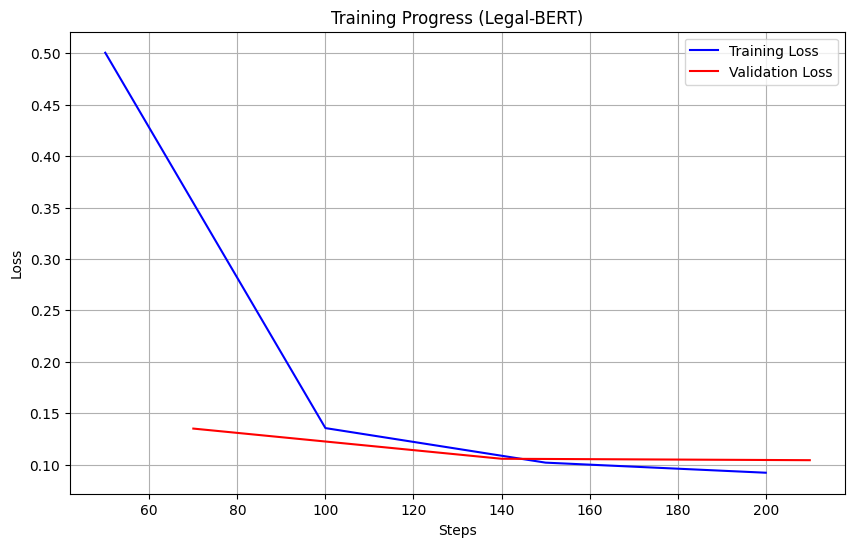

In [14]:
import matplotlib.pyplot as plt
import json
import os

output_dir = "./legal_bert_output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"Saving model to {output_dir}...")
trainer.save_model(output_dir)
tokenizer.save_pretrained(output_dir)

history = trainer.state.log_history
history_path = f"{output_dir}/training_history.json"
with open(history_path, "w") as f:
    json.dump(history, f)
print(f"History saved to {history_path}")

train_loss = [x['loss'] for x in history if 'loss' in x]
steps = [x['step'] for x in history if 'loss' in x]

if train_loss:
    plt.figure(figsize=(10, 6))
    plt.plot(steps, train_loss, label="Training Loss", color="blue")

    val_loss = [x['eval_loss'] for x in history if 'eval_loss' in x]
    val_steps = [x['step'] for x in history if 'eval_loss' in x]
    if val_loss:
        plt.plot(val_steps, val_loss, label="Validation Loss", color="red")

    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Training Progress (Legal-BERT)")
    plt.legend()
    plt.grid(True)

    graph_path = f"{output_dir}/training_graph.png"
    plt.savefig(graph_path)
    print(f"Graph saved to {graph_path}")
    plt.show()
else:
    print("Not enough history to plot graph yet.")

### 7. DistilBERT Finetuning (Ritvik & Mit)

Using tokenized datasets: train_distilbert, test_distilbert, validation_distilbert

In [ ]:
# 6. DistilBERT Finetuning (Your Name)
import numpy as np
import pandas as pd
import evaluate
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer, DataCollatorForTokenClassification
from transformers import DistilBertForTokenClassification

"""
setting up distilbert as our baseline model.
it is lighter and faster than legal-bert and has fewer parameters.

"""
distil_checkpoint = "distilbert-base-uncased" # letter case independent 
distil_tokenizer = AutoTokenizer.from_pretrained(distil_checkpoint) # using autotokenizer

label_list = ["O", "B-PER", "I-PER", "B-LOC", "I-LOC", "B-ORG", "I-ORG"]
label2id = {label: i for i, label in enumerate(label_list)}
id2label = {i: label for i, label in enumerate(label_list)}
type_mapper = {"PERSON": "PER", "ORGANIZATION": "ORG", "LOCATION": "LOC", "ORG": "ORG", "LOC": "LOC", "PER": "PER"}

"""
Instead of relying on spaces and commas to create tokens, we are using offset mapping
To make sure that the tokens align well with the BERT model and they come from the correct offsets in the dataset

"""
def tokenize_and_align_distil(examples):

    tokenized_inputs = distil_tokenizer(
        examples["text"], truncation=True, max_length=512,
        return_offsets_mapping=True, padding="max_length" # padding the tokens with max token length
    )
    labels = []

    for i, doc_offsets in enumerate(tokenized_inputs["offset_mapping"]):
        doc_mentions = examples["entity_mentions"][i] if examples["entity_mentions"][i] is not None else []
        
        doc_labels = [0] * len(doc_offsets)
        for idx, (start, end) in enumerate(doc_offsets):
            if start == end:
                doc_labels[idx] = -100 # ignore special tokens
                continue

            for mention in doc_mentions:
                if start >= mention['start_offset'] and end <= mention['end_offset']:
                    raw_type = mention['entity_type']
                    short_type = type_mapper.get(raw_type, "ORG")
                    
                    # logic to check beginning and inside of tokens
                    prefix = "B-" if start == mention['start_offset'] else "I-"
                    label_name = f"{prefix}{short_type}"
                    doc_labels[idx] = label2id.get(label_name, 0)
                    break
        labels.append(doc_labels)

    tokenized_inputs["labels"] = labels
    tokenized_inputs.pop("offset_mapping")
    return tokenized_inputs


# creating a dataset dict
distil_datasets = DatasetDict({
    "train": Dataset.from_pandas(df_train),
    "validation": Dataset.from_pandas(df_validation),
    "test": Dataset.from_pandas(df_test)
})

distil_tokenized = distil_datasets.map(
    tokenize_and_align_distil,
    batched=True,
    remove_columns=distil_datasets["train"].column_names
)
print("done. distilbert tokens aligned.")

# initializing the distilbert model
distil_model = AutoModelForTokenClassification.from_pretrained(
    distil_checkpoint,
    num_labels=len(label_list),
    id2label=id2label,
    label2id=label2id
)

# setting hyperparams
db_args = TrainingArguments(
    "distilbert-ner-output",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="no",
    logging_steps=50
)

db_trainer = Trainer(
    model=distil_model,
    args=db_args,
    train_dataset=distil_tokenized["train"],
    eval_dataset=distil_tokenized["validation"],
    data_collator=DataCollatorForTokenClassification(distil_tokenizer)
)

print("starting distilbert training...")
db_trainer.train()

c:\Users\ritvi\OneDrive\Documents\GBC_AASD\Math for DL 1\Project\Code\distilbert-v1\Lib\site-packages\huggingface_hub\file_download.py:130: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ritvi\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Map: 100%|██████████| 555/555 [00:01<00:00, 359.15 examples/s]

done. distilbert tokens aligned.


Loading weights: 100%|██████████| 100/100 [00:00<00:00, 719.02it/s, Materializing param=distilbert.transformer.layer.5.sa_layer_norm.weight]   
DistilBertForTokenClassification LOAD REPORT from: distilbert-base-uncased
Key                     | Status     | 
------------------------+------------+-
vocab_transform.bias    | UNEXPECTED | 
vocab_projector.bias    | UNEXPECTED | 
vocab_transform.weight  | UNEXPECTED | 
vocab_layer_norm.weight | UNEXPECTED | 
vocab_layer_norm.bias   | UNEXPECTED | 
classifier.bias         | MISSING    | 
classifier.weight       | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


starting distilbert training...


c:\Users\ritvi\OneDrive\Documents\GBC_AASD\Math for DL 1\Project\Code\distilbert-v1\Lib\site-packages\torch\utils\data\dataloader.py:775: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  super().__init__(loader)


Epoch,Training Loss,Validation Loss
1,0.562893,0.161495
2,0.161686,0.117175
3,0.102585,0.115844


NameError: name 'evaluate_model_performance' is not defined

In [ ]:
import evaluate
import numpy as np
import pandas as pd

# initialize metric
metric = evaluate.load("seqeval")

def evaluate_model_performance(trainer, eval_dataset, model_name):
    # getting predictions and filtering out the -100 ignored tokens
    # to calculate real metrics
    print(f"--- evaluating {model_name} ---")
    predictions, labels, _ = trainer.predict(eval_dataset)
    predictions = np.argmax(predictions, axis=2)

    true_predictions = [
        [label_list[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [label_list[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    results = metric.compute(predictions=true_predictions, references=true_labels)

    return {
        "Model": model_name,
        "F1 Score": results['overall_f1'],
        # recall is critical here - we can't miss sensitive info
        "Recall": results['overall_recall'],
        "Precision": results['overall_precision'],
        "Accuracy": results['overall_accuracy']
    }

metrics_db = evaluate_model_performance(db_trainer, distil_tokenized["test"], model_name="DistilBERT_v1")

--- evaluating DistilBERT_v1 ---



 final results:


NameError: name 'metrics_legal' is not defined

In [32]:
print("\n final results:")
display(pd.DataFrame([metrics_db]).round(4))


 final results:


,Model,F1 Score,Recall,Precision,Accuracy
0,DistilBERT_v1,0.8098,0.8202,0.7998,0.9595



 final results (DistilBERT):


,Model,F1 Score,Recall,Precision,Accuracy
0,DistilBERT_v1,0.8098,0.8202,0.7998,0.9595


saving model to ./distilbert_output...


Writing model shards: 100%|██████████| 1/1 [00:00<00:00,  3.87it/s]


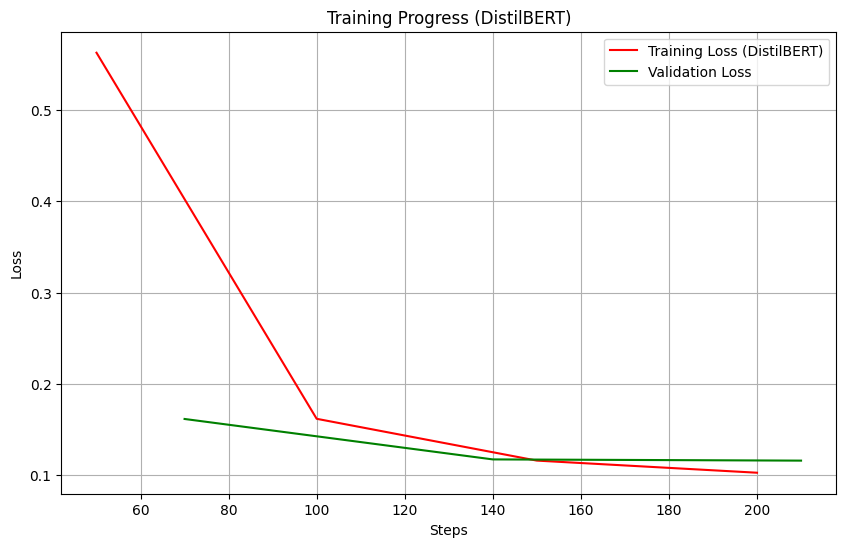

In [34]:
# evaluation Plots
print("\n final results (DistilBERT):")
display(pd.DataFrame([metrics_db]).round(4))

# saving and plotting
import matplotlib.pyplot as plt
import json
import os

output_dir = "./distilbert_output"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print(f"saving model to {output_dir}...")
db_trainer.save_model(output_dir)
distil_tokenizer.save_pretrained(output_dir)

history = db_trainer.state.log_history
# filtering for loss values to plot
train_loss = [x['loss'] for x in history if 'loss' in x]
steps = [x['step'] for x in history if 'loss' in x]

if train_loss:
    plt.figure(figsize=(10, 6))
    plt.plot(steps, train_loss, label="Training Loss (DistilBERT)", color="Red")
    
    # checking for validation loss
    val_loss = [x['eval_loss'] for x in history if 'eval_loss' in x]
    val_steps = [x['step'] for x in history if 'eval_loss' in x]
    
    if val_loss:
        plt.plot(val_steps, val_loss, label="Validation Loss", color="Green")
        
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Training Progress (DistilBERT)")
    plt.legend()
    plt.grid(True)
    plt.show()

In [35]:
# Inference Testing DistilBERT

from transformers import pipeline

"""
creating a prediction pipeline.
this removes the complex tokenization and id-mapping.
aggregation_strategy="simple" merges sub-tokens like "Hen" "##rik" back into one entity "Henrik".

"""
checkpoint_path = "./distilbert_output" 
classifier = pipeline(
    "token-classification", 
    model=checkpoint_path, 
    tokenizer=checkpoint_path, 
    aggregation_strategy="simple"
)

def redact_text(text):
    """
    input: raw string
    output: string with entities replaced by [REDACTED]
    
    """
    results = classifier(text)
    
    # we need to sort entities by start index in reverse order
    # so that replacing text doesn't mess up the indices of earlier entities
    results = sorted(results, key=lambda x: x['start'], reverse=True)
    
    redacted_text = text
    
    print("Entities Found:")
    for entity in results:
        label = entity['entity_group']
        score = entity['score']
        word = text[entity['start']:entity['end']]
        print(f" - {word} ({label}) | Confidence: {score:.2f}")
        
        # simple redaction logic
        if label != "O":
            # replacing the slice of text with a mask
            redacted_text = redacted_text[:entity['start']] + "[REDACTED]" + redacted_text[entity['end']:]
            
    return redacted_text

# Test on a fake legal sentence
sample_text = "The case against Mr. Henrik Hasslund was filed in the Kingdom of Denmark on 5 September 2007."
print(f"\nOriginal: {sample_text}")

cleaned = redact_text(sample_text)
print(f"\nRedacted: {cleaned}")

Loading weights: 100%|██████████| 102/102 [00:00<00:00, 734.56it/s, Materializing param=distilbert.transformer.layer.5.sa_layer_norm.weight]    



Original: The case against Mr. Henrik Hasslund was filed in the Kingdom of Denmark on 5 September 2007.
Entities Found:
 - 5 September 2007 (ORG) | Confidence: 0.81
 - of Denmark (ORG) | Confidence: 0.41
 - Kingdom (LOC) | Confidence: 0.26
 - Mr. Henrik Hasslund (PER) | Confidence: 0.76

Redacted: The case against [REDACTED] was filed in the [REDACTED] [REDACTED] on [REDACTED].


### 8. Pre-trained DistilBERT - Benchmarking (Sayed)

Using tokenized datasets: train_distilbert, test_distilbert, validation_distilbert

### 9. RoBERTa, BERT-NER, ALBERT
These are some more models that can be used. Feel free to pick any and start working